In [7]:
import pandas as pd
data_set_location='bill_authentication.csv'
data_set=pd.read_csv(data_set_location)
print('Size of data set:', data_set.shape)
data_set.dropna(inplace=True)
print('Size after removing na:',data_set.shape)

Size of data set: (1372, 5)
Size after removing na: (1372, 5)


In [4]:
data_set.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [14]:
column=data_set.columns
feature=[col for col in column ][:-1]
print(feature)
data_set.describe(include='all')

['Variance', 'Skewness', 'Curtosis', 'Entropy']


,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Number of fake notes: 762  ,which is  55.539358600583085 % of total notes
Number of authentic notes: 5  ,which is  0.36443148688046645 % of total notes


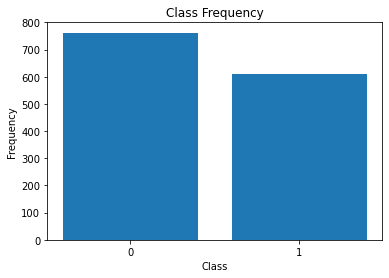

[0 1]


In [24]:
class_0=data_set[data_set['Class']==0].shape[0]
class_1=data_set[data_set['Class']==1].shape[1]

print('Number of fake notes:',class_0, ' ,which is ', class_0/data_set.shape[0]*100, '% of total notes')
print('Number of authentic notes:',class_1, ' ,which is ', class_1/data_set.shape[0]*100, '% of total notes')

import numpy as np
unique, counts = np.unique(Y, return_counts=True)
class_labels=[str(unique[0]), str(unique[1])]
import matplotlib.pyplot as plt
plt.bar(class_labels, counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print(unique)

In [30]:
X=data_set[feature].values
Y=data_set.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print('Size of training set:', X_train.shape, 'In terms of percentange:',X_train.shape[0]/data_set.shape[0])
print('Size of test set:', X_test.shape,'In terms of percentange:', X_test.shape[0]/data_set.shape[0])


Size of training set: (1029, 4) In terms of percentange: 0.75
Size of test set: (343, 4) In terms of percentange: 0.25


In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Cross-validation Score: ',scores.mean(axis=0))

Cross-validation Score:  0.9815439261188729


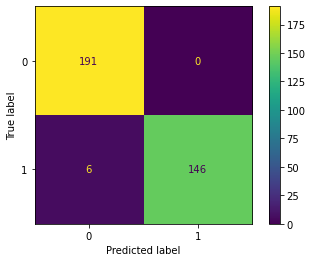

In [32]:
from sklearn.metrics import plot_confusion_matrix
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [35]:
y_pred=clf.predict(X_test)
from sklearn.metrics import precision_recall_fscore_support
precision,recall,f_score,support=precision_recall_fscore_support(y_test, y_pred, average='micro')
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f_score)



Precision: 0.9825072886297376
Recall: 0.9825072886297376
F1 score: 0.9825072886297376
